In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
''' Bài tập 1: Sử dụng dữ liệu dulieuxettuyendaihoc.csv. 
Hãy gom cụm điểm trung bình toán của cả 2 học kì năm lớp 12 (gọi là TBT12) và điểm LOGIC với số cụm tốt nhất
Thiết lập random_state là 17. Hãy trả lời các câu hỏi bên dưới:  
1. Số cụm là bao nhiêu là tốt nhất
2. Giá trị các vector thể hiện cho các center của cụm
3. Giá trị Lowest SSE đánh giá mô hình
4. In ra bảng dữ liệu và kết quả gom cụm
5. Hãy cho biết tổng khoảng cách trung bình của 5 phần tử đầu tiên thuộc cụm có nhãn là 1 đến tâm của cụm 
6. Trực quan tổng hợp thống kê cho kết quả gom cụm
7. Trực quan kết quả gom cụm
8. Hãy cho biết một sinh viên có TBT12 là 6.78 và điểm thi LOGIC là 5.76 thì sẽ thuộc cụm nào 
'''

''' Bài tập 2: Hãy làm lại các yêu cầu như trên nhưng dùng độ đo (metric) là Manhattan để đo lường sự giống nhau của 
hai phần tử '''

In [2]:
df = pd.read_csv('dulieuxettuyendaihoc.csv')
df.head(10)

,MSSV,T1,T2,T3,T4,T5,T6,GT,DT,KV,NGONNGU,TOANLOGICPHANTICH,GIAIQUYETVANDE,KT,NGAYTHI,DINHHUONGNGHENGHIEP
0,SV001,7.2,8.4,7.4,7.2,7.4,6.9,F,NaN,2NT,3.25,3.25,4.50,A1,12/7/2018,No
1,SV002,5.4,6.3,4.3,4.9,3.0,4.0,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,Yes
2,SV003,5.6,5.0,2.8,6.1,4.8,5.7,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,No
3,SV004,6.6,5.1,5.9,4.1,6.1,7.4,M,NaN,1,4.25,4.25,5.25,D1,12/7/2018,No
4,SV005,6.0,5.4,7.6,4.4,6.8,8.0,M,NaN,2NT,4.25,4.50,5.00,A,12/7/2018,No
5,SV006,9.3,9.6,7.1,8.5,8.5,7.8,M,NaN,1,1.50,4.00,6.00,D1,12/7/2018,No
6,SV007,2.8,4.4,4.6,4.7,5.4,5.3,F,NaN,2,6.50,6.75,5.25,C,12/7/2018,Yes
7,SV008,8.3,6.7,8.6,8.3,8.5,8.3,F,NaN,2,3.75,4.50,4.25,D1,12/7/2018,Yes
8,SV009,6.5,7.3,6.4,8.1,7.7,7.7,F,NaN,1,3.50,3.50,6.75,D1,12/7/2018,Yes
9,SV0010,7.3,8.0,6.5,5.5,7.5,6.9,F,NaN,1,4.00,4.75,5.50,D1,12/7/2018,Yes


In [3]:
df.rename(columns={'TOANLOGICPHANTICH':'LOGIC'},inplace=True)

In [4]:
#Tạo biến
df['TBT12'] = (df['T5']+df['T6'])/2

In [5]:
data = df[['TBT12','LOGIC']]
data.head(10)

,TBT12,LOGIC
0,7.15,3.25
1,3.50,4.00
2,5.25,6.75
3,6.75,4.25
4,7.40,4.50
5,8.15,4.00
6,5.35,6.75
7,8.40,4.50
8,7.70,3.50
9,7.20,4.75


In [6]:
from sklearn.cluster import KMeans

In [ ]:
'''
Hãy gom cụm điểm trung bình toán của cả 2 học kì năm lớp 12 (gọi là TBT12) và điểm LOGIC với số cụm tốt nhất
Thiết lập random_state là 17
'''

In [7]:
#1. Số cụm là bao nhiêu là tốt nhất
kmeans = KMeans(n_clusters=4).fit(data)

In [8]:
print(kmeans.cluster_centers_)#Trung tâm cụm
print(kmeans.inertia_)#Giá trị tâm (SSE) thể hiện mức độ biến động và độ phân tán của các điểm dữ liệu. Giá trị inertia càng nhỏ thì mô hình càng tốt
print(kmeans.n_iter_) #số lần lặp giá trị
print(kmeans.labels_[:])#Nhãn

[[7.18870968 3.49193548]
 [4.76842105 3.55263158]
 [8.39545455 5.        ]
 [6.59107143 4.99107143]]
93.91753447952728
9
[0 1 3 3 3 2 3 2 0 3 0 2 2 0 2 1 0 3 2 0 2 0 1 3 1 1 3 3 2 1 0 3 3 0 3 3 0
 1 1 0 0 2 1 1 0 3 0 2 0 2 3 0 0 3 0 2 2 3 3 1 0 0 0 0 0 1 3 2 2 1 3 2 3 1
 0 1 0 0 1 0 2 3 3 3 2 3 3 0 3 3 2 2 2 0 0 0 1 2 1 1]


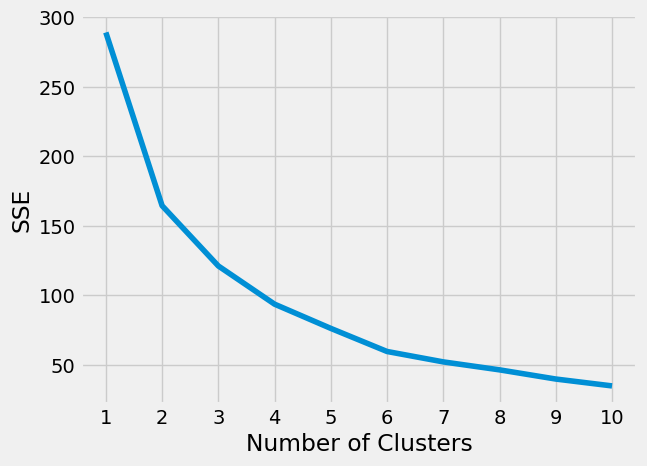

In [9]:
#Chọn số cụm tốt nhất
kmeans_kwargs = {"init": "random","n_init":10,"max_iter":300,"random_state":17}
sse =[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

plt.style.use('fivethirtyeight')
plt.plot(range(1,11),sse)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [10]:
#Cách 2 Dùng phương phát độ đo ElBoww để tìm số cụm là tốt nhất
from kneed import KneeLocator
k1 = KneeLocator(range(1,11), sse, curve='convex', direction='decreasing')
print(k1.elbow)

3


In [ ]:
#Câu 1: Số cụm tốt nhất là 3

In [13]:
#2. Giá trị các vector thể hiện cho các center của cụm
print(kmeans.cluster_centers_)

[[7.13809524 4.76190476]
 [5.6875     4.45833333]
 [7.00277778 3.75      ]
 [8.63636364 4.77272727]
 [5.3        6.75      ]
 [8.155      3.75      ]
 [7.96666667 6.45833333]
 [6.75833333 2.45833333]
 [4.3        3.775     ]
 [5.         2.4375    ]]


In [14]:
#3. Giá trị Lowest SSE đánh giá mô hình
print(kmeans.inertia_)

35.01843145743146


In [15]:
# Gán nhãn cho từng điểm dữ liệu
labels = kmeans.labels_[:]

# 4. In ra bảng dữ liệu và kết quả gom cụm
data['Cluster'] = labels
print(data[['TBT12', 'LOGIC', 'Cluster']])

    TBT12  LOGIC  Cluster
0    7.15   3.25        2
1    3.50   4.00        8
2    5.25   6.75        4
3    6.75   4.25        2
4    7.40   4.50        0
..    ...    ...      ...
95   7.25   1.50        7
96   5.60   3.75        1
97   8.75   8.00        6
98   4.20   3.50        8
99   5.35   2.50        9

[100 rows x 3 columns]


C:\Users\THANH DUOC\AppData\Local\Temp\ipykernel_2164\1718160873.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = labels


In [22]:
X = data[['TBT12', 'LOGIC','Cluster']].values

In [27]:
# Lấy tâm của cụm có nhãn là 1
cluster_1_center = centers[1]

# Lấy các phần tử thuộc cụm có nhãn là 1
cluster_1_indices = np.where(data['Cluster'] == 1)[0]
first_5_elements_indices = cluster_1_indices[:5]

# Tính tổng khoảng cách từ các phần tử đầu tiên đến tâm của cụm
distances = np.linalg.norm(X[first_5_elements_indices, :-1] - cluster_1_center, axis=1)
average_distance = np.mean(distances)

# In ra tổng khoảng cách trung bình
print("Tổng khoảng cách trung bình của 5 phần tử đầu tiên thuộc cụm có nhãn là 1 đến tâm của cụm:", average_distance)


Tổng khoảng cách trung bình của 5 phần tử đầu tiên thuộc cụm có nhãn là 1 đến tâm của cụm: 0.8130743862930092


[[7.13809524 4.76190476]
 [5.6875     4.45833333]
 [7.00277778 3.75      ]
 [8.63636364 4.77272727]
 [5.3        6.75      ]
 [8.155      3.75      ]
 [7.96666667 6.45833333]
 [6.75833333 2.45833333]
 [4.3        3.775     ]
 [5.         2.4375    ]]


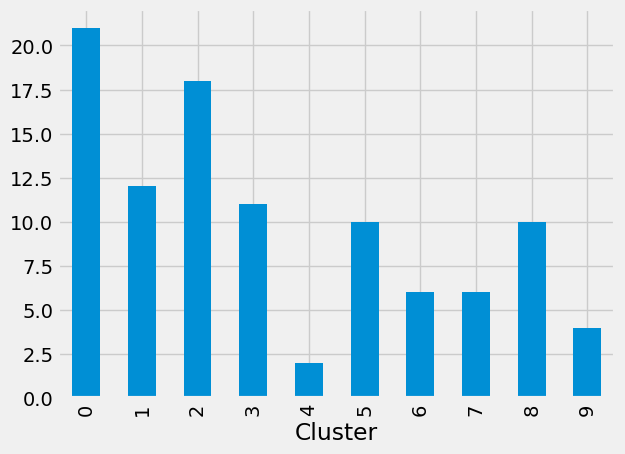

In [28]:
#6. Trực quan tổng hợp thống kê cho kết quả gom cụm
centroids = kmeans.cluster_centers_
print(centroids)

gr_data = data.groupby(['Cluster']).size()
gr_data.plot.bar()
plt.show()


C:\Users\THANH DUOC\AppData\Local\Temp\ipykernel_2164\2760608055.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gr_data_min = data.groupby(['Cluster'])['TBT12','LOGIC'].min()


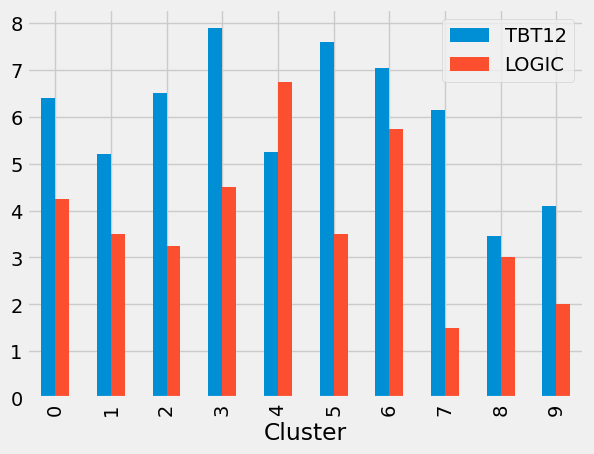

In [29]:
gr_data_min = data.groupby(['Cluster'])['TBT12','LOGIC'].min()
gr_data_min.plot(kind='bar')
plt.show()

C:\Users\THANH DUOC\AppData\Local\Temp\ipykernel_2164\1033340499.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gr_data_mean = data.groupby(['Cluster'])['TBT12','LOGIC'].mean()


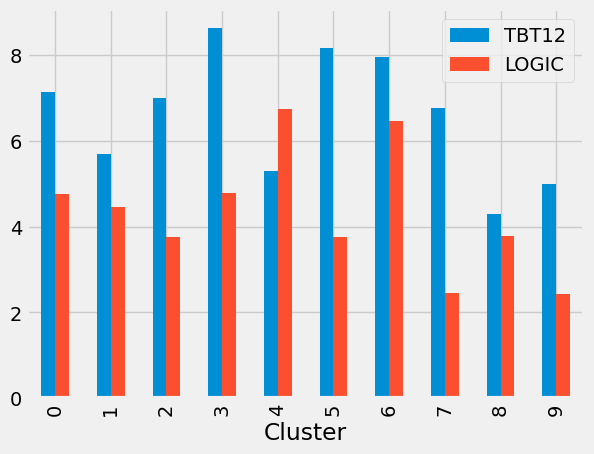

In [19]:
gr_data_mean = data.groupby(['Cluster'])['TBT12','LOGIC'].mean()
gr_data_mean.plot(kind='bar')
plt.show()

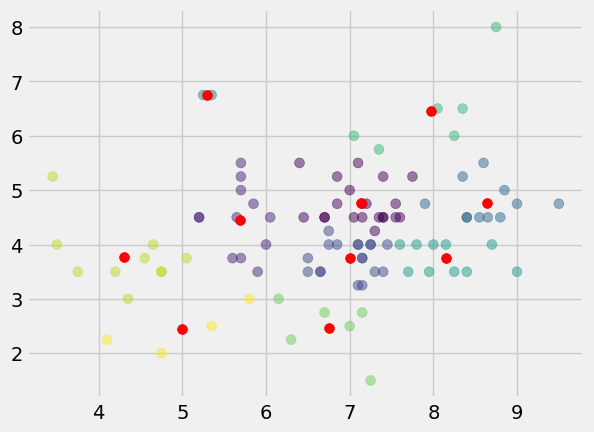

In [20]:
#7. Trực quan kết quả gom cụm
plt.scatter(df['TBT12'], df['LOGIC'], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [56]:
# Tạo một mảng chứa thông tin của sinh viên muốn dự đoán
student = np.array([[6.78, 5.76]])



# Dự đoán cụm cho sinh viên
predicted_cluster = kmeans.predict(student)

# In ra cụm mà sinh viên thuộc về
print("Sinh viên thuộc cụm:", predicted_cluster[0])


Sinh viên thuộc cụm: 0


C:\Users\THANH DUOC\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
